# Ensembles
---------------------------------

This example shows how we can use ensemble techniques to improve predictions on a dataset combining several models.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMClassifier(X, y, verbose=2, random_state=1)
atom.run(models=['rf', 'xgb', 'lgb'], metric='accuracy')

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ================== >>
Shape: (569, 31)
Scaled: False
-----------------------------------
Train set size: 456
Test set size: 113
-----------------------------------
Train set balance: 0:1 <==> 1.0:1.7
Test set balance: 0:1 <==> 1.0:1.5
-----------------------------------
Distribution of classes:
|    |   dataset |   train |   test |
|---:|----------:|--------:|-------:|
|  0 |       212 |     167 |     45 |
|  1 |       357 |     289 |     68 |


Training ===================================== >>
Models: RF, XGB, LGB
Metric: accuracy


Results for Random Forest:         
Fit ---------------------------------------------
Train evaluation --> accuracy: 1.0000
Test evaluation --> accuracy: 0.9735
Time elapsed: 0.000s
-------------------------------------------------
Total time: 0.000s


Results for XGBoost:         
Fit ---------------------------------------------
Train evaluation --> acc

## Voting

In [4]:
# After fitting the models we combine them in a Voting model
atom.voting()

Voting added to the models!


In [5]:
# We now have an extra model in the pipeline
atom.models

['RF', 'XGB', 'LGB', 'Vote']

In [6]:
# We can use the Voting model like other models to make predictions or plots
atom.vote.predict_proba_test[:10]

array([[6.47844489e-01, 3.52155513e-01],
       [2.17899149e-04, 9.99782101e-01],
       [4.51055181e-05, 9.99954894e-01],
       [9.93257249e-01, 6.74275245e-03],
       [3.40757277e-03, 9.96592427e-01],
       [9.76583519e-01, 2.34164828e-02],
       [7.11484346e-03, 9.92885157e-01],
       [2.88644009e-05, 9.99971136e-01],
       [2.33973052e-02, 9.76602695e-01],
       [3.43444481e-03, 9.96565555e-01]])

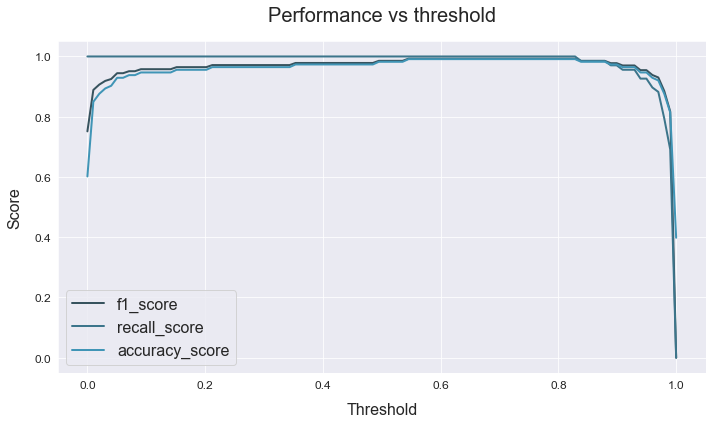

In [7]:
atom.vote.plot_threshold(metric=["f1", "recall", "accuracy"])

In [8]:
atom.vote.delete()

Models deleted successfully!


## Stacking

In [9]:
# Just like Voting, we can create a Stacking model
atom.stacking(estimator="LDA")

Stacking added to the models!


In [10]:
# The underlying final estimator uses the predictions and the features as dataset
atom.stack.dataset.head()

,predict_proba_RF,predict_proba_XGB,predict_proba_LGB,target
0,0.85,0.983980,0.998580,1
1,0.05,0.004780,0.000161,0
2,1.00,0.999642,0.999963,1
3,0.07,0.001379,0.001161,0
4,0.19,0.043952,0.004474,0


In [11]:
atom.stack.predict(X)

Transforming data for branch main...


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,